# Uitwerkingen Les 3: Opgave 1 (donderdag 6-mrt-2025)

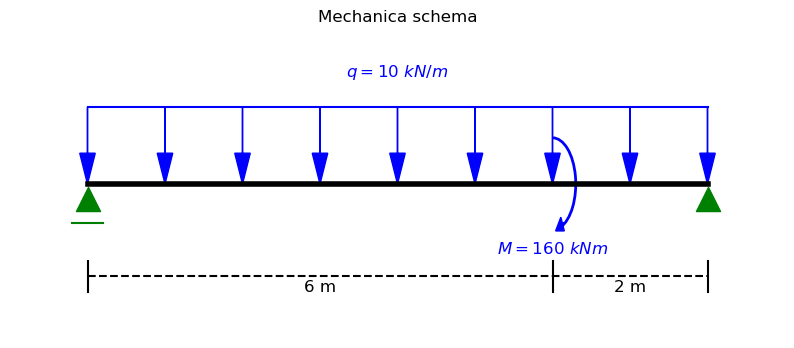

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Instellen van de balklengte en belastingen
balk_lengte = 8  # meters
verdeelde_belasting = 10  # kN/m
koppel_locatie = 6  # meters
koppel_waarde = 160  # kNm (met de klok mee)

# Coördinaten van de ondersteuningen
ondersteuning_links = 0  # Rolscharnier
ondersteuning_rechts = balk_lengte  # Gewone scharnier

# Instellen van de figuur
fig, ax = plt.subplots(figsize=(10, 4))

# Tekenen van de balk
ax.plot([0, balk_lengte], [0, 0], 'k', lw=4, label="Balk")

# Tekenen van de ondersteuningen als gevulde groene driehoeken
ax.scatter(ondersteuning_links, -0.1, marker='^', s=300, color='green', label="Rolscharnier")
ax.plot([-0.2, 0.2], [-0.25, -0.25], color='green')  # Meetlijn
ax.scatter(ondersteuning_rechts, -0.1, marker='^', s=300, color='green', label="Scharnier")

# Tekenen van de verdeelde belasting met blauwe pijlen en label
x_vals = np.linspace(0, balk_lengte, 9)  
for x in x_vals:
    ax.arrow(x, 0.5, 0, -0.3, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
ax.text(balk_lengte / 2, 0.7, r"$q = 10\ kN/m$", fontsize=12, color='blue', ha='center')
ax.plot([0, balk_lengte], [0.5, 0.5], color='blue')  # Meetlijn

# Tekenen van het koppel met cirkelpijlen en blauwe label
#ax.text(koppel_locatie, 0.6, r"$M = 160\ kNm$", fontsize=12, color='blue', ha='center')
#ax.arrow(koppel_locatie - 0.3, 0.2, 0.3, 0.3, head_width=0.1, head_length=0.1, fc='blue', ec='blue', linestyle='dashed')
#ax.arrow(koppel_locatie + 0.3, 0.2, -0.3, 0.3, head_width=0.1, head_length=0.1, fc='blue', ec='blue', linestyle='dashed')

# Tekenen van de maatvoering onder de balk
ax.plot([0, 0], [-0.5, -0.7], 'k')  # Begin meetlijn
ax.plot([6, 6], [-0.5, -0.7], 'k')  # Begin meetlijn
ax.plot([balk_lengte, balk_lengte], [-0.5, -0.7], 'k')  # Eind meetlijn
ax.plot([0, balk_lengte], [-0.6, -0.6], 'k--')  # Meetlijn
ax.text(6 / 2, -0.7, "6 m", fontsize=12, ha='center')
ax.text(7, -0.7, "2 m", fontsize=12, ha='center')

# Maatvoering voor koppel locatie
#ax.plot([koppel_locatie, koppel_locatie], [-0.5, -0.4], 'k')  # Markering
#ax.text(koppel_locatie, -0.55, "6 m", fontsize=12, ha='center')

# Labels en titel in overeenstemming met template
ax.set_xlim(-1, balk_lengte + 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(0, balk_lengte + 1, 1))
#ax.set_yticks([])
ax.set_xlabel(r"$x$", color="red", fontsize=14)
ax.set_ylabel(r"$z$", color="red", fontsize=14, rotation=0, labelpad=15)
ax.set_title("Mechanica schema")

# Koppelinstellingen
koppel_locatie = 6  # Positie van het koppel in meters
koppel_radius = 0.6  # Straal van de boog


# Bereken de positie van de pijlpunt op de boog
hoek_pijl = 90  # Pijlpunt bij 270 graden (onderkant boog)
pijl_x = 6.15 #koppel_locatie + (koppel_radius / 2) * np.cos(np.radians(hoek_pijl))
pijl_y = -0.25 #0.3 + (koppel_radius / 2) * np.sin(np.radians(hoek_pijl))

# Pijlpunt toevoegen aan de boog
#ax.add_patch(arc)
ax.arrow(pijl_x, pijl_y, -0.02, -0.01, head_width=0.1, head_length=0.1, fc='blue', ec='blue')

# Label voor het koppel
ax.text(koppel_locatie, -.45, r"$M = 160\ kNm$", fontsize=12, color='blue', ha='center')

# Legenda
#ax.legend()

# Assen uitschakelen
ax.axis('off')
#ax.grid()

# Creëer de boog voor het koppel
arc = patches.Arc((koppel_locatie,-0), koppel_radius, koppel_radius, angle=270, theta1=20, theta2=180, color='blue', lw=2)
ax.add_patch(arc)

# Plot weergeven
plt.show()


## Uitwerking

De functie van het buigendmoment kan gevonden worden door twee snedes te maken. 

Voor snede I - tussen $[0 < x < 6]$ geldt;

\begin{align}
 M_1 = -5x^2+20x
\end{align}

Voor snede II - tussen $[6 < x < 8]$ geldt;

\begin{align}
 M_2 = -5x^2+20x+160
\end{align}

De functie voor het buigendmoment is bekend en kan nu getekend worden;

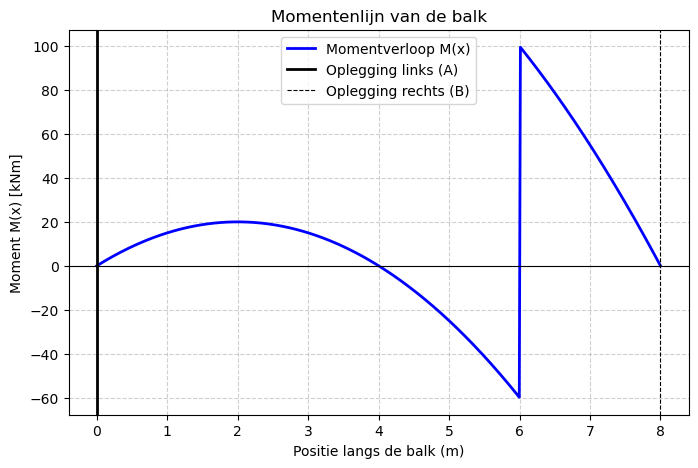

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Gegeven parameters
L = 8       # Lengte van de balk (m)
x_C = 6     # Locatie van het koppel (m)
q = -10     # Verdeelde belasting (kN/m, naar beneden)
M_C = 160   # Koppel (kNm, met de klok mee)
R_A = 20    # Reactiekracht bij A (kN)
R_B = 60    # Reactiekracht bij B (kN)

# Discretisatie van de balk
x_values = np.linspace(0, L, 500)
M_values = np.zeros_like(x_values)

# Momentverloop berekenen
for i, x in enumerate(x_values):
    if x < x_C:  # Links van het koppel
        M_values[i] = R_A * x + (q / 2) * x**2
    else:  # Rechts van het koppel
        M_values[i] = R_A * x + (q / 2) * x**2 + M_C  # Sprong in moment door koppel

# Plot de momentenlijn
plt.figure(figsize=(8, 5))
plt.plot(x_values, M_values, label="Momentverloop M(x)", linewidth=2, color='blue')
plt.axhline(0, color='black', linewidth=0.8)
#plt.axvline(x_C, color='blue', linestyle='dashed', linewidth=1, label="Koppel bij x=6m")
plt.axvline(0, color='black', linewidth=2, label="Oplegging links (A)")
plt.axvline(L, color='black', linestyle='dashed', linewidth=0.8, label="Oplegging rechts (B)")
plt.xlabel("Positie langs de balk (m)")
plt.ylabel("Moment M(x) [kNm]")
plt.title("Momentenlijn van de balk")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


De functie voor de dwarskracht kan gevonden worden door de functie van het buigendmoment te differentiëren.

Voor snede I - tussen $[0 < x < 6]$ geldt;

\begin{align}
 V_1 = -10x+20
\end{align}

Voor snede II - tussen $[6 < x < 8]$ geldt;

\begin{align}
 V_2 = -10x+20
\end{align}

De functie voor de dwarskracht is bekend en kan nu getekend worden;

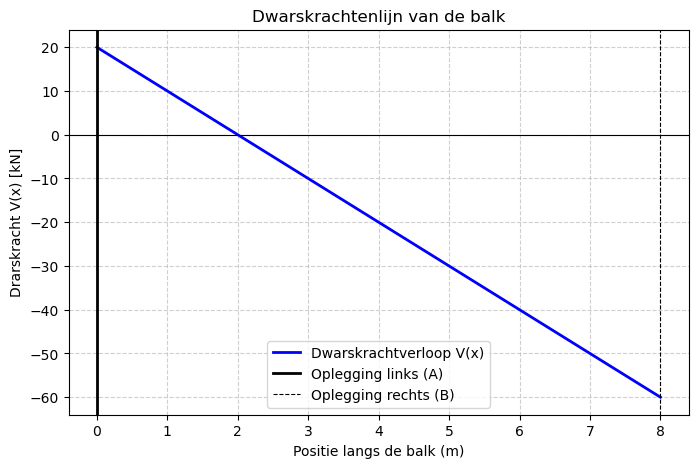

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Gegeven parameters
L = 8       # Lengte van de balk (m)
x_C = 6     # Locatie van het koppel (m)
q = -10     # Verdeelde belasting (kN/m, naar beneden)
M_C = 160   # Koppel (kNm, met de klok mee)
R_A = 20    # Reactiekracht bij A (kN)
R_B = 60    # Reactiekracht bij B (kN)

# Discretisatie van de balk
x_values = np.linspace(0, L, 500)
V_values = np.zeros_like(x_values)

# Momentverloop berekenen
for i, x in enumerate(x_values):
    if x < x_C:  # Links van het koppel
        V_values[i] = -10 * x + 20
    else:  # Rechts van het koppel
        V_values[i] = -10 * x + 20  # Sprong in moment door koppel

# Plot de momentenlijn
plt.figure(figsize=(8, 5))
plt.plot(x_values, V_values, label="Dwarskrachtverloop V(x)", linewidth=2, color='blue')
plt.axhline(0, color='black', linewidth=0.8)
#plt.axvline(x_C, color='blue', linestyle='dashed', linewidth=1, label="Koppel bij x=6m")
plt.axvline(0, color='black', linewidth=2, label="Oplegging links (A)")
plt.axvline(L, color='black', linestyle='dashed', linewidth=0.8, label="Oplegging rechts (B)")
plt.xlabel("Positie langs de balk (m)")
plt.ylabel("Drarskracht V(x) [kN]")
plt.title("Dwarskrachtenlijn van de balk")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


De functie voor de elastische lijn (doorbuigings) kan gevonden worden door gebruik te maken van;

$EI \dfrac{d^2v}{dx^2}= M$ en deze twee keer te integreren.

Voor snede I - tussen $[0 < x < 6]$ geldt;


\begin{align}
EI\dfrac{d^2v_1}{dx^2} &= M_1 \\
EI\dfrac{d^2v_1}{dx^2} &= -5x^2+20x \\
EI\dfrac{dv_1}{dx} &= -\dfrac{5}{3}x^3+10x^2+C_1 \\
EIv_1 &= -\dfrac{5}{12}x^4+\dfrac{10}{3}x^3+C_1x + C_2
\end{align}


Voor snede II - tussen $[6 < x < 8]$ geldt;


\begin{align}
EI\dfrac{d^2v_2}{dx^2} &= M_2 \\
EI\dfrac{d^2v_2}{dx^2} &= -5x^2+20x + 160\\
EI\dfrac{dv_2}{dx} &= -\dfrac{5}{3}x^3+10x^2+160x+C_3 \\
EIv_2 &= -\dfrac{5}{12}x^4+\dfrac{10}{3}x^3+80x^2+C_3x + C_4
\end{align}


De integratie constanten $C_1$, $C_2$, $C_3$ en $C_4$ kunnen gevonden worden door gebruik te maken van de volgende randvoorwaardes en overgangsvoorwaarden.

Bij oplegging $A$ geldt;

$x=0, v_1=0$


\begin{align}
EIv &= -\dfrac{5}{12}x^4+\dfrac{10}{3}x^3+C_1x + C_2 \\
EI\cdot 0 &= -\dfrac{5}{12}0^4+\dfrac{10}{3}\cdot 0^3+C_1\cdot 0 + C_2 \\
 0 &= -0 +0 + 0 + C_2 \\
 C_2 &= 0
\end{align}


Bij oplegging $B$ geldt;

$x=8, v_2=0$


\begin{align}
EIv &= -\dfrac{5}{12}x^4+\dfrac{10}{3}x^3+80x^2+C_3x + C_4 \\
0 &= -\dfrac{5}{12} \cdot 8^4+\dfrac{10}{3} \cdot 8^3+80 \cdot 8^2+ 8C_3 + C_4 \\
0 &= -\dfrac{20480}{12} +\dfrac{5120}{3} + 5120+ 8C_3 + C_4 \\
0 &= 5120+ 8C_3 + C_4 \\
C_4 &= -8C_3 - 5120
\end{align}


Als overgangsvoorwaarde geldt;

$x=6, EIv_1=EIv_2$


\begin{align}
-\dfrac{5}{12}x^4+\dfrac{10}{3}x^3+C_1x =& -\dfrac{5}{12}x^4+\dfrac{10}{3}x^3+80x^2+C_3x + C_4 \\
C_1x =& +80x^2+C_3x + C_4 \\
6C_1 =& + 80 \cdot 6^2 + 6C_3 + C_4 \\
6C_1 =& + 2880 + 6C_3 + C_4 \\
6C_1 =& + 2880 + 6C_3 -8C_3 - 5120\\
6C_1 =& -2240 -2C_3\\
C_1 =& \dfrac{-2240}{6} - \dfrac{2}{6}C_3\\
C_1 =& \dfrac{-1120}{3} - \dfrac{1}{3}C_3\\
\end{align}


Als overgangsvoorwaarde geldt;

$x=6, EI\dfrac{dv_1}{dx}=EI\dfrac{dv_2}{dx}$


\begin{align}
-\dfrac{5}{3}x^3+10x^2+C_1 &= -\dfrac{5}{3}x^3+10x^2+160x+C_3 \\
C_1 &= 160x+C_3 \\
C_1 &= 160 \cdot 6 + C_3 \\
C_1 &= 960 + C_3 \\
\dfrac{-1120}{3} - \dfrac{1}{3}C_3 &= 960 + C_3 \\
- \dfrac{1}{3}C_3 &= \dfrac{4000}{3} + C_3 \\
- \dfrac{4}{3}C_3 &= \dfrac{4000}{3}\\
C_3 &= -1000
\end{align}


Nu $C_3$ bekent is kan deze ingevuld worden in de andere onbekenden;

$C_3$ invullen geeft $C_1$:


\begin{align}
C_1 &= \dfrac{-1120}{3} - \dfrac{1}{3}C_3\\
C_1 &= \dfrac{-1120}{3} - \dfrac{1}{3} \cdot -1000\\
C_1 &= \dfrac{-1120}{3} + \dfrac{1000}{3} \\
C_1 &= -\dfrac{120}{3}\\
C_1 &= -40
\end{align}


$C_3$ invullen geeft $C_4$:


\begin{align}
C_4 &= -8C_3 - 5120 \\
C_4 &= -8 \cdot -1000 - 5120
C_4 &= 8000 - 5120 \\
C_4 &= 2880
\end{align}


De waardes voor $C_1$ en $C_2$ invullen geeft:

Voor snede I - tussen $[0 < x < 6]$ geldt;


\begin{align}
EIv_1 &= -\dfrac{5}{12}x^4 + \dfrac{10}{3}x^3 - 40x
\end{align}


De waardes voor $C_3$ en $C_4$ invullen geeft:

Voor snede II - tussen $[6 < x < 8]$ geldt;


\begin{align}
EIv_2 &= -\dfrac{5}{12}x^4+\dfrac{10}{3}x^3+80x^2 -1000x + 2880
\end{align}


De elastische lijn (doorbuigingslijn) kan nu getekend worden;

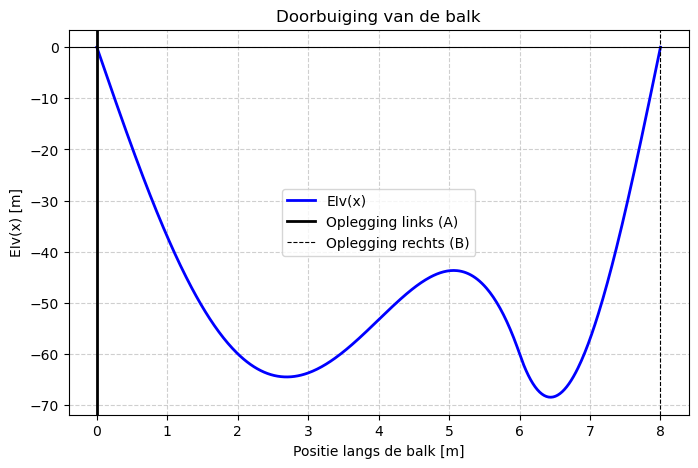

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Gegeven parameters
L = 8       # Lengte van de balk (m)
x_C = 6     # Locatie van het koppel (m)
q = -10     # Verdeelde belasting (kN/m, naar beneden)
M_C = 160   # Koppel (kNm, met de klok mee)
R_A = 20    # Reactiekracht bij A (kN)
R_B = 60    # Reactiekracht bij B (kN)

# Discretisatie van de balk
x_values = np.linspace(0, L, 500)
EIv_values = np.zeros_like(x_values)

# Momentverloop berekenen
for i, x in enumerate(x_values):
    if x < x_C:  # Links van het koppel
        EIv_values[i] = (-(5/12) * x**4 + (10/3) * x**3 - 40*x) * 1
    else:  # Rechts van het koppel
        EIv_values[i] = (-(5/12) * x**4 + (10/3) * x**3 + 80*x**2 - 1000*x +2880) * 1 # Sprong in moment door koppel

# Plot de momentenlijn
plt.figure(figsize=(8, 5))
plt.plot(x_values, EIv_values, label="EIv(x)", linewidth=2, color='blue')
plt.axhline(0, color='black', linewidth=0.8)
#plt.axvline(x_C, color='blue', linestyle='dashed', linewidth=1, label="Koppel bij x=6m")
plt.axvline(0, color='black', linewidth=2, label="Oplegging links (A)")
plt.axvline(L, color='black', linestyle='dashed', linewidth=0.8, label="Oplegging rechts (B)")
plt.xlabel("Positie langs de balk [m]")
plt.ylabel("EIv(x) [m]")
plt.title("Doorbuiging van de balk")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


De locatie waar de doorbuiging maximaal is, kan gevonden worden door de afgeleide van de elastische lijn (doorbuigingslijn) gelijk aan 0 te stellen.

De afgeleide van de elastische lijn is de hellingsfunctie. De hellingsfunctie is bekend en kan getekend worden.

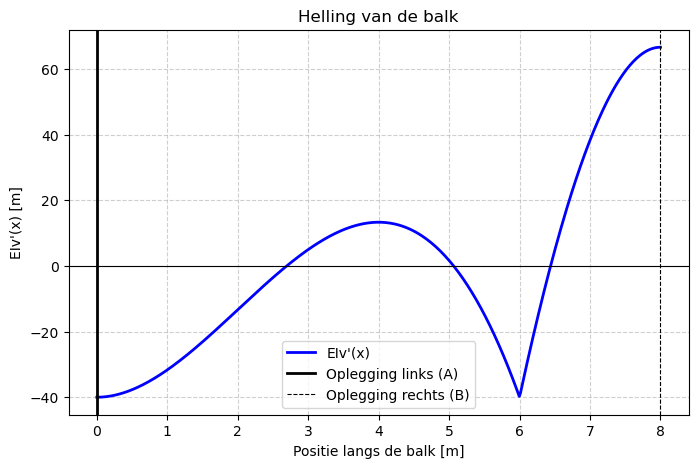

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Gegeven parameters
L = 8       # Lengte van de balk (m)
x_C = 6     # Locatie van het koppel (m)
q = -10     # Verdeelde belasting (kN/m, naar beneden)
M_C = 160   # Koppel (kNm, met de klok mee)
R_A = 20    # Reactiekracht bij A (kN)
R_B = 60    # Reactiekracht bij B (kN)

# Discretisatie van de balk
x_values = np.linspace(0, L, 500)
EIphi_values = np.zeros_like(x_values)

# Momentverloop berekenen
for i, x in enumerate(x_values):
    if x < x_C:  # Links van het koppel
        EIphi_values[i] = (-(5/3) * x**3 + (10) * x**2 - 40) * 1
    else:  # Rechts van het koppel
        EIphi_values[i] = (-(5/3) * x**3 + (10) * x**2 + 160*x - 1000) * 1 # Sprong in moment door koppel

# Plot de momentenlijn
plt.figure(figsize=(8, 5))
plt.plot(x_values, EIphi_values, label="EIv'(x)", linewidth=2, color='blue')
plt.axhline(0, color='black', linewidth=0.8)
#plt.axvline(x_C, color='blue', linestyle='dashed', linewidth=1, label="Koppel bij x=6m")
plt.axvline(0, color='black', linewidth=2, label="Oplegging links (A)")
plt.axvline(L, color='black', linestyle='dashed', linewidth=0.8, label="Oplegging rechts (B)")
plt.xlabel("Positie langs de balk [m]")
plt.ylabel("EIv'(x) [m]")
plt.title("Helling van de balk")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


Voor snede II - tussen $[6 < x < 8]$ geldt;

Absoluut minimuum als $EI\dfrac{dv_2}{dx} = 0$ , dus:


\begin{align}
EI\dfrac{dv_2}{dx} &= 0 \\
-\dfrac{5}{3}x^3+10x^2+160x-1000 &=0 \\
\end{align}

Dit is een derdegraads vergelijking deze kunnen we niet analytisch oplossen.

Numeriek kunnen we de x-coördinaat van het absolute minimum wel vinden namelijk,

In [106]:
b = np.argmin(EIv_values)
print("De locatie van het abolute minimim is", b/500 * 8, "m")

De locatie van het abolute minimim is 6.432 m


De maximale doorbuiging kan gevonden worden door het x-coördinaat van de balk in te vullen in de functie voor de elastische lijn (doorbuigingslijn).

De waarde 6.43 invullen in de vergelijking voor de doorbuiging geeft:

Voor snede II - tussen $[6 < x < 8]$ geldt;


\begin{align}
EIv_2 &= -\dfrac{5}{12}\cdot 6.43^4 + \dfrac{10}{3} \cdot 6.43^3 + 80 \cdot 6.43^2 - 1000 \cdot 6.43 + 2880 \\
EIv_2 & \approx -68.50 \\
v_2 & \approx -\dfrac{-68.50}{EI}
\end{align}
